# Notebook P&L Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

# Load data
df = pd.read_csv("data/Ecommerce_Sales_Data_2024_2025.csv")

## Създаване на P&L метрики

In [2]:
# Base metrics
df['COGS'] = df['Sales'] - df['Profit']
df['Gross Profit'] = df['Profit']

# Simulated marketing cost (примерно 15% от sales)
df['Marketing Cost'] = df['Sales'] * 0.15

# Contribution Profit
df['Contribution Profit'] = df['Gross Profit'] - df['Marketing Cost']

df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    dayfirst=True
)

df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Simulated fixed cost
monthly_fixed_cost = 50000

monthly_pnl = df.groupby('Month').agg({
    'Sales':'sum',
    'COGS':'sum',
    'Gross Profit':'sum',
    'Marketing Cost':'sum',
    'Contribution Profit':'sum'
}).reset_index()

monthly_pnl['Fixed Cost'] = monthly_fixed_cost
monthly_pnl['Net Profit'] = (
    monthly_pnl['Contribution Profit'] -
    monthly_pnl['Fixed Cost']
)

monthly_pnl

/tmp/ipykernel_7337/3073149179.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(


,Month,Sales,COGS,Gross Profit,Marketing Cost,Contribution Profit,Fixed Cost,Net Profit
0,2023-01,"584,272.20","458,971.13","125,301.07","87,640.83","37,660.24",50000,"-12,339.76"
1,2023-02,"1,554,566.30","1,306,459.31","248,106.99","233,184.95","14,922.05",50000,"-35,077.95"
2,2023-03,"1,426,900.85","1,189,245.46","237,655.39","214,035.13","23,620.26",50000,"-26,379.74"
3,2023-04,"2,155,426.90","1,811,320.64","344,106.26","323,314.03","20,792.23",50000,"-29,207.77"
4,2023-05,"2,351,046.20","1,976,868.71","374,177.49","352,656.93","21,520.56",50000,"-28,479.44"
5,2023-06,"726,512.75","595,872.09","130,640.66","108,976.91","21,663.75",50000,"-28,336.25"
6,2023-07,"886,948.25","773,637.68","113,310.57","133,042.24","-19,731.67",50000,"-69,731.67"
7,2023-08,"3,296,253.50","2,816,893.54","479,359.96","494,438.02","-15,078.06",50000,"-65,078.06"
8,2023-09,"1,888,508.80","1,600,898.48","287,610.32","283,276.32","4,334.00",50000,"-45,666.00"
9,2023-10,"16,279,029.80","13,884,191.12","2,394,838.68","2,441,854.47","-47,015.79",50000,"-97,015.79"


## P&L Insight

Despite strong revenue, the business struggles to achieve net profitability.

Key reasons:
- High marketing spend
- Fixed costs pressure
- Margin sensitivity

This highlights the importance of contribution margin control when scaling.

## Margin KPI

In [3]:
monthly_pnl['Net Margin %'] = (
    monthly_pnl['Net Profit'] /
    monthly_pnl['Sales']
)

monthly_pnl

,Month,Sales,COGS,Gross Profit,Marketing Cost,Contribution Profit,Fixed Cost,Net Profit,Net Margin %
0,2023-01,"584,272.20","458,971.13","125,301.07","87,640.83","37,660.24",50000,"-12,339.76",-0.02
1,2023-02,"1,554,566.30","1,306,459.31","248,106.99","233,184.95","14,922.05",50000,"-35,077.95",-0.02
2,2023-03,"1,426,900.85","1,189,245.46","237,655.39","214,035.13","23,620.26",50000,"-26,379.74",-0.02
3,2023-04,"2,155,426.90","1,811,320.64","344,106.26","323,314.03","20,792.23",50000,"-29,207.77",-0.01
4,2023-05,"2,351,046.20","1,976,868.71","374,177.49","352,656.93","21,520.56",50000,"-28,479.44",-0.01
5,2023-06,"726,512.75","595,872.09","130,640.66","108,976.91","21,663.75",50000,"-28,336.25",-0.04
6,2023-07,"886,948.25","773,637.68","113,310.57","133,042.24","-19,731.67",50000,"-69,731.67",-0.08
7,2023-08,"3,296,253.50","2,816,893.54","479,359.96","494,438.02","-15,078.06",50000,"-65,078.06",-0.02
8,2023-09,"1,888,508.80","1,600,898.48","287,610.32","283,276.32","4,334.00",50000,"-45,666.00",-0.02
9,2023-10,"16,279,029.80","13,884,191.12","2,394,838.68","2,441,854.47","-47,015.79",50000,"-97,015.79",-0.01


## P&L Waterfall Chart

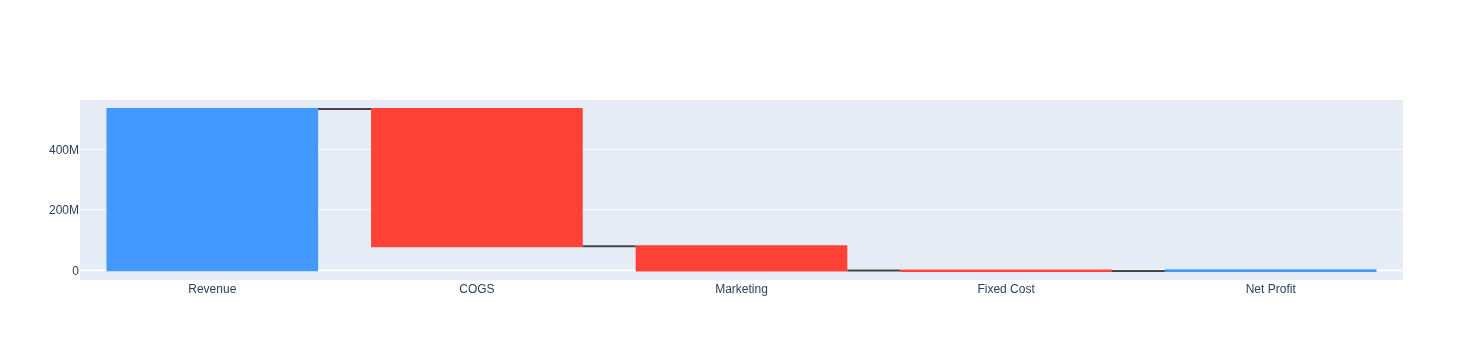

In [4]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name="P&L",
    orientation="v",
    measure=["absolute","relative","relative","relative","total"],
    x=["Revenue","COGS","Marketing","Fixed Cost","Net Profit"],
    y=[
        monthly_pnl['Sales'].sum(),
        -monthly_pnl['COGS'].sum(),
        -monthly_pnl['Marketing Cost'].sum(),
        -monthly_pnl['Fixed Cost'].sum(),
        monthly_pnl['Net Profit'].sum()
    ],
))

fig.show()

## P&L Waterfall Insight

The P&L waterfall chart illustrates how revenue is gradually reduced by costs to arrive at net profit.

It provides clear visibility into which cost components have the greatest impact on profitability.

## Break-even Perspective

Based on current contribution margins, the business needs a consistent revenue base to cover fixed costs before generating real profit.

This emphasizes:

• the importance of margin discipline

• the risk of scaling low-margin revenue

• the need to monitor contribution profit monthly

## Profit Quality Insight

Not all revenue growth improves profitability.
    
Some months show higher sales but lower contribution profit.

This suggests that:

• growth quality matters more than growth speed

• efficient growth should be prioritized over aggressive scaling

## Profit Volatility

Net profit fluctuates significantly month-to-month.

This indicates sensitivity to:

• marketing spend

• pricing strategy

• cost structure

Reducing volatility improves predictability and planning.

## Management Takeaways

Management should focus on:

• Contribution margin stability

• Marketing efficiency

• Controlled discount strategy

• Profit predictability